# QuIC-AI Test Notebook

This notebook runs through the process for training and testing the models evaluated in the AI-QuIC study.

## Universal Import of Data and Packages

In [51]:
### Import Packages
import importlib as imp
import ML_QuIC as ML_QuIC
imp.reload(ML_QuIC)
import copy
import numpy as np
import tensorflow as tf

In [52]:
### Import Data and Create Objects to Analyze
DATA_DIR = './Data/GrinderClean'
RANDOM_SEED = 7

# Load dataAC
ml_quic = ML_QuIC.ML_QuIC()
ml_quic.import_dataset(data_dir=DATA_DIR)
ml_quic.get_dataset_statistics()

Loading Data from ./Data/GrinderClean
---- Dataset Label Distribution ----
Negative Samples: 6781
False Positive Samples: 239
Positive Samples: 991

---- Well Content Distribution: ----
Data Wells: 7027
Control Wells: 984


[6781, 239, 991, 984, 7027]

## Unsupervised
### KMeans

In [53]:
### Add 2 KMeans Models
from Models import KMeansModel
ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3,
                                          file_path= './SavedModels/Raw/', model_name='kmeans'
                                          ), model_name='KMeans Raw', data_type='raw', tag='Unsupervised')
from Models import KMeansModel
ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3,
                                          file_path= './SavedModels/Analysis/', model_name='kmeans'
                                          ), model_name='KMeans Metrics', data_type='analysis', tag='Unsupervised')


KMeans Model Loaded:
<class 'sklearn.cluster._kmeans.KMeans'>

KMeans Model Loaded:
<class 'sklearn.cluster._kmeans.KMeans'>


### Spectral Clustering

In [54]:
### Add Spectral Clustering
from Models import SpectralClustering
ml_quic.add_model(SpectralClustering.SpectralClustering(n_clusters = 3), model_name='Spectral Raw', data_type='raw', tag='Unsupervised')

from Models import SpectralClustering
ml_quic.add_model(SpectralClustering.SpectralClustering(n_clusters = 3), model_name='Spectral Metrics', data_type='analysis', tag='Unsupervised')

## Supervised Models

### SVM

In [55]:
### SVM
from Models import SVM
ml_quic.add_model(SVM.SVM(
    file_path='./SavedModels/Raw/', model_name='svm'
    ), model_name = 'SVM Raw', data_type = 'raw', tag = 'Supervised')

ml_quic.add_model(SVM.SVM(file_path='./SavedModels/Analysis/', random_state = 30, model_name='svm'), model_name = 'SVM Metrics', data_type = 'analysis', tag = 'Supervised')


SVM Model Loaded:
<class 'sklearn.svm._classes.SVC'>

SVM Model Loaded:
<class 'sklearn.svm._classes.SVC'>


### MLP

In [56]:
### MLP
from Models import MLP
ml_quic.add_model(MLP.MLP(NDIM = ml_quic.get_num_timesteps_raw(), 
                          file_path='./SavedModels/Raw/', model_name='mlp'
                          ), model_name = 'MLP Raw', data_type = 'raw', tag='Supervised')

\MLP Model Loaded:
<class 'keras.engine.functional.Functional'>


## Training and Evaluation

### Training

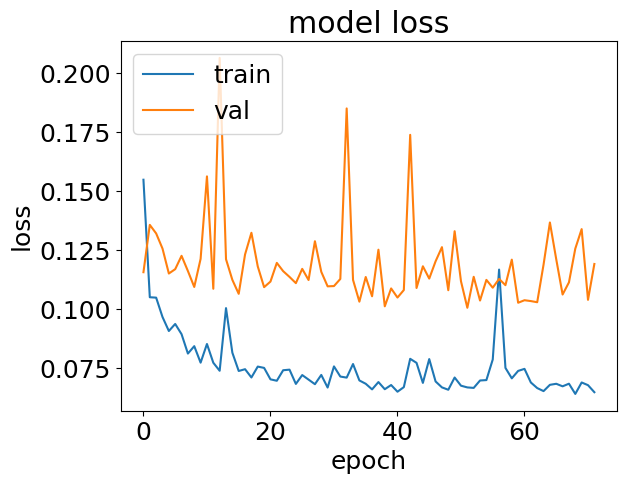

In [57]:
### Train Unsupervised Models
ml_quic.separate_train_test(tags=['Unsupervised'], train_type=3)
ml_quic.train_models(tags=['Unsupervised'])

### Train Supervised Models
ml_quic.separate_train_test(tags=['Supervised'], train_type=0)
ml_quic.train_models(tags = ['Supervised'])

### Unsupervised Evaluation

KMeans Raw:
              precision    recall  f1-score   support

         neg       0.92      0.99      0.96      7020
         pos       0.90      0.43      0.58       991

    accuracy                           0.92      8011
   macro avg       0.91      0.71      0.77      8011
weighted avg       0.92      0.92      0.91      8011

KMeans Metrics:
              precision    recall  f1-score   support

         neg       1.00      0.97      0.98      7020
         pos       0.80      1.00      0.89       991

    accuracy                           0.97      8011
   macro avg       0.90      0.98      0.94      8011
weighted avg       0.98      0.97      0.97      8011



c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Raw:
              precision    recall  f1-score   support

         neg       1.00      0.91      0.95      7020
         pos       0.61      0.97      0.75       991

    accuracy                           0.92      8011
   macro avg       0.80      0.94      0.85      8011
weighted avg       0.95      0.92      0.93      8011



c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Spectral Metrics:
              precision    recall  f1-score   support

         neg       1.00      0.05      0.09      7020
         pos       0.13      1.00      0.23       991

    accuracy                           0.17      8011
   macro avg       0.56      0.52      0.16      8011
weighted avg       0.89      0.17      0.11      8011

-------- Results on False Positives for KMeans Raw --------
Accuracy on False Positives: 0.8368200836820083
False Positives Account for 6.32% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 26.76923076923077
Average RAF: 0.03788857584615385
Average MPR: 14.150274442179485
Average MS: 1049.1816239410257
Correctly Classified FP Characteristics:
Average Time to Threshold: 37.9858
Average RAF: 0.029968578994999998
Average MPR: 6.835894972829999
Average MS: 496.33249999700007


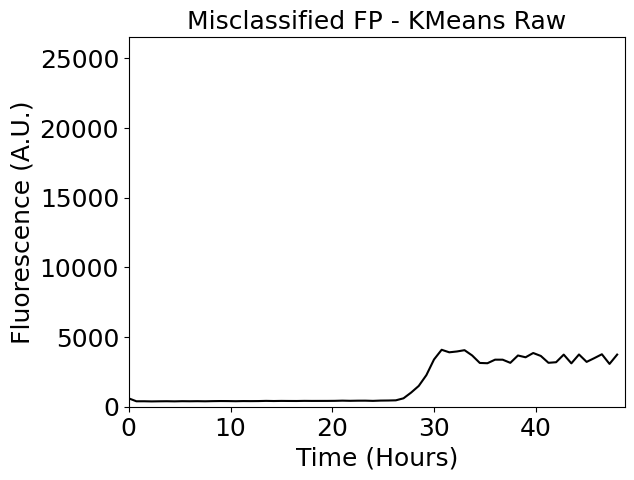

-------- Results on False Positives for KMeans Metrics --------
Accuracy on False Positives: 0.0
False Positives Account for 99.17% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 36.15548117154812
Average RAF: 0.031260963418410045
Average MPR: 8.029454802556486
Average MS: 586.5463737786611
Correctly Classified FP Characteristics:
Average Time to Threshold: nan
Average RAF: nan
Average MPR: nan
Average MS: nan


c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


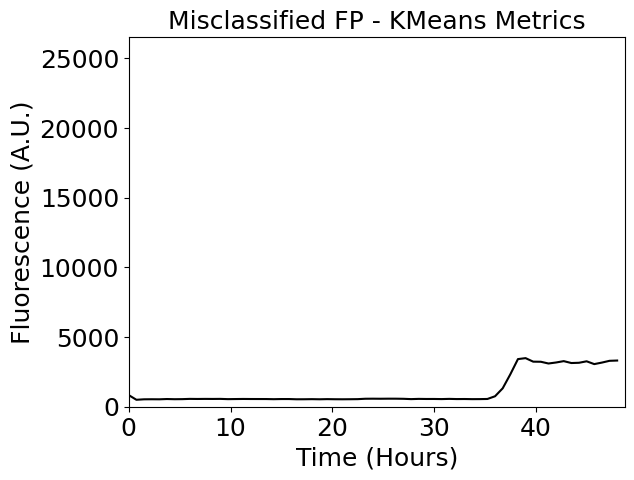

-------- Results on False Positives for Spectral Raw --------
Accuracy on False Positives: 0.23430962343096234
False Positives Account for 27.94% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 34.059617486338794
Average RAF: 0.03290872826775956
Average MPR: 9.222412732688525
Average MS: 680.7490892519126
Correctly Classified FP Characteristics:
Average Time to Threshold: 43.004464285714285
Average RAF: 0.025876303285714282
Average MPR: 4.131038709446429
Average MS: 278.70535714285717


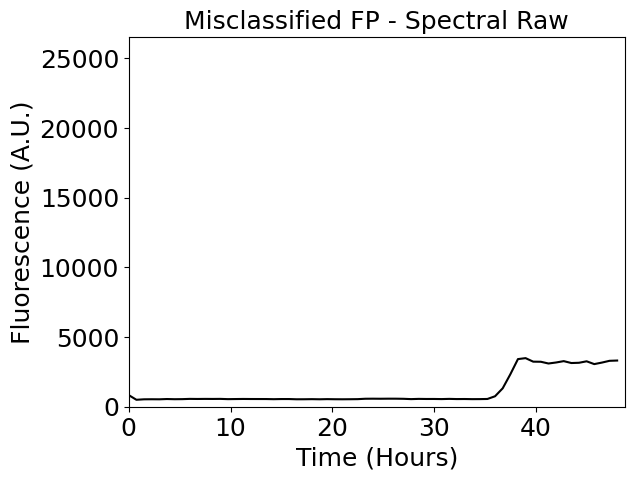

-------- Results on False Positives for Spectral Metrics --------
Accuracy on False Positives: 0.0
False Positives Account for 3.58% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 36.15548117154812
Average RAF: 0.031260963418410045
Average MPR: 8.029454802556486
Average MS: 586.5463737786611
Correctly Classified FP Characteristics:
Average Time to Threshold: nan
Average RAF: nan
Average MPR: nan
Average MS: nan


c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


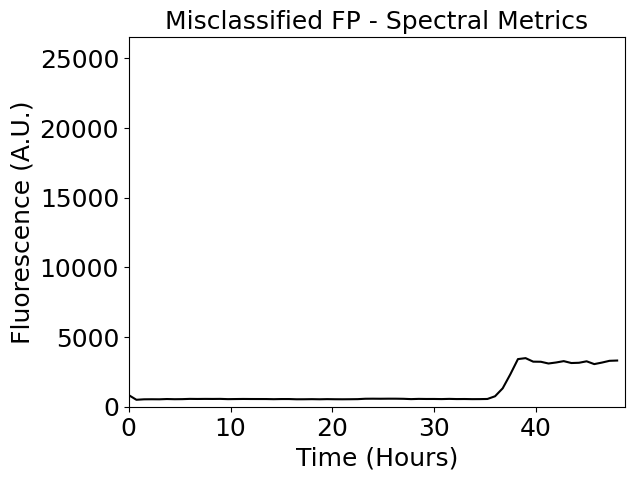

-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 4.5, Average: 24.097911200807264, Max: 48.0
RAF:
	Min: 0.020833333, Average: 0.049054801466195765, Max: 0.222222222
MPR:
	Min: 1.241918665, Average: 11.743839485905147, Max: 54.23108384
MS:
	Min: 61.5, Average: 856.7055163084763, Max: 4282.833333


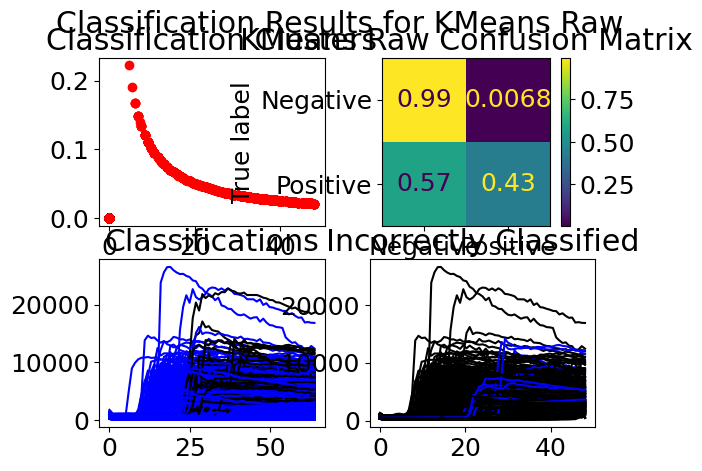

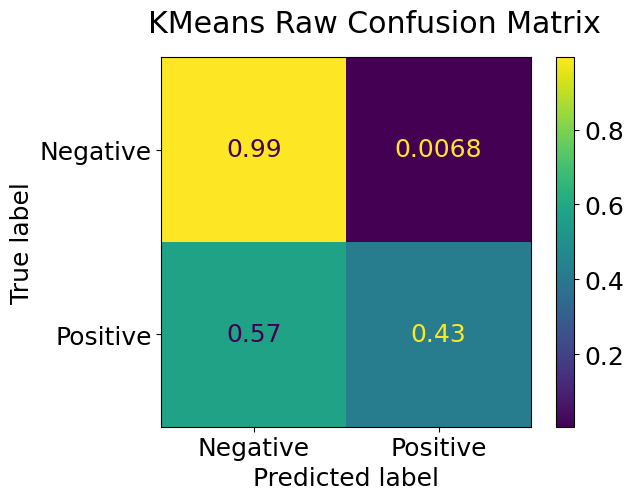

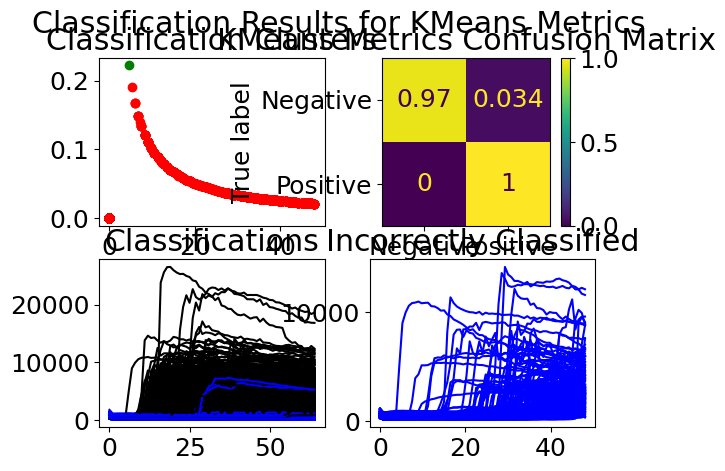

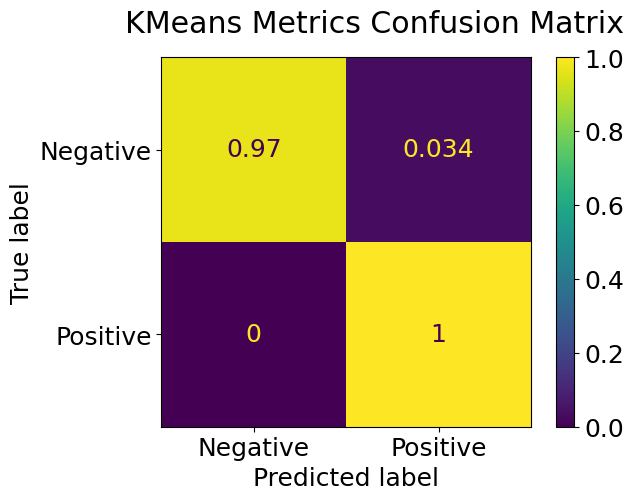

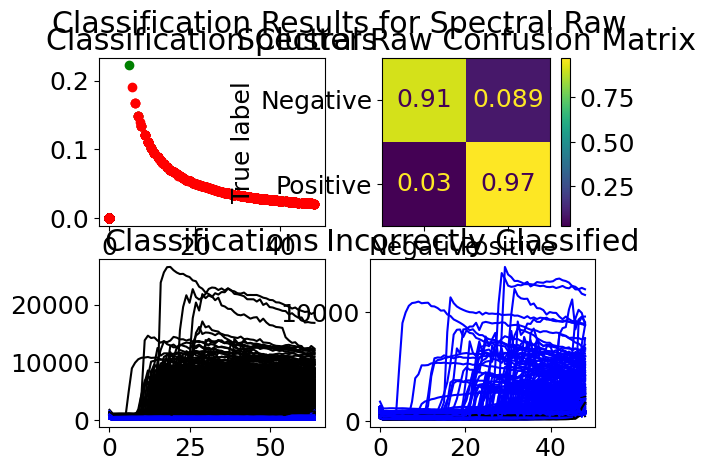

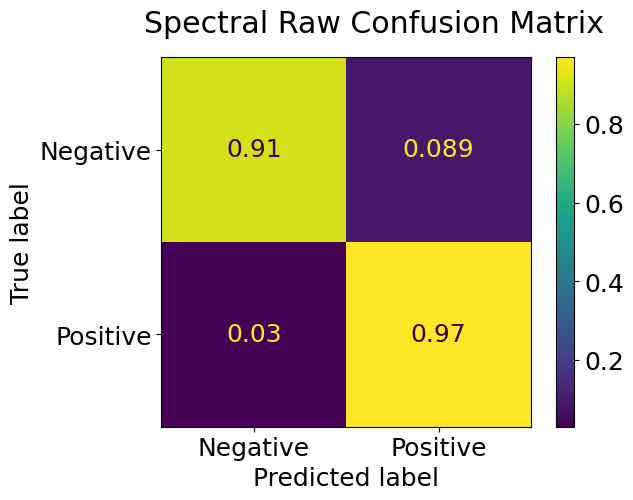

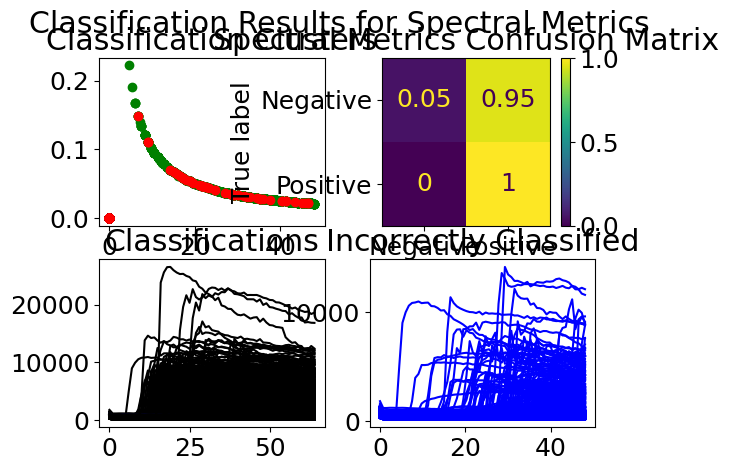

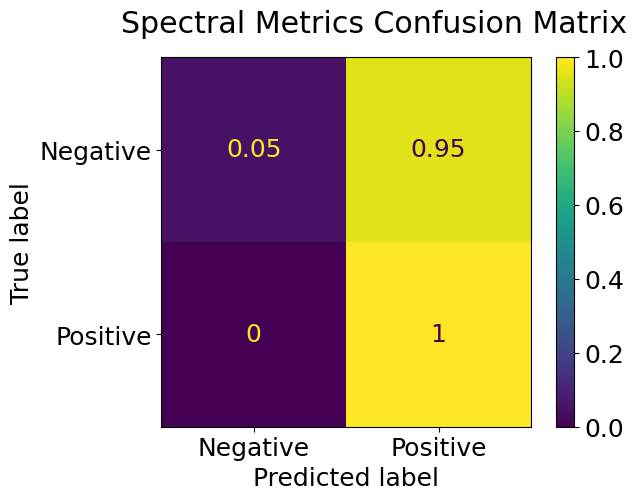

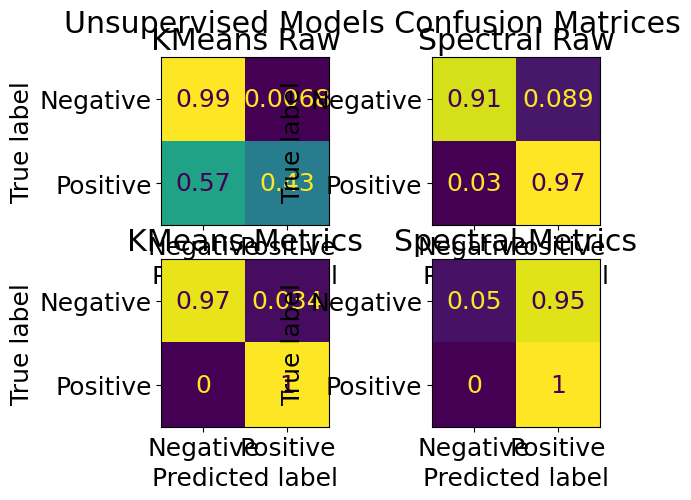

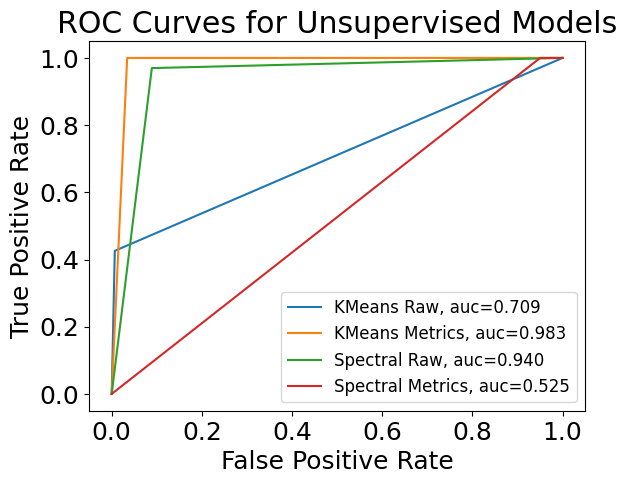

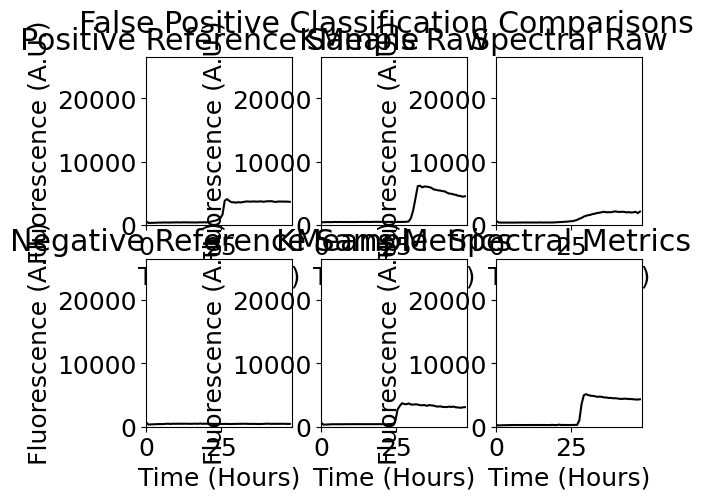

In [58]:
### Get Plots and Scores
ml_quic.get_model_scores(tags=['Unsupervised'])
ml_quic.evaluate_fp_performance(tags=['Unsupervised'])
ml_quic.get_model_plots(tags=['Unsupervised'])
ml_quic.get_group_plots_unsupervised(tags = ['Unsupervised'])

### Supervised Evaluation

SVM Raw:
              precision    recall  f1-score   support

         neg       0.98      0.98      0.98       719
         pos       0.82      0.85      0.84        82

    accuracy                           0.97       801
   macro avg       0.90      0.92      0.91       801
weighted avg       0.97      0.97      0.97       801

SVM Metrics:
              precision    recall  f1-score   support

         neg       0.99      0.98      0.98       719
         pos       0.82      0.88      0.85        82

    accuracy                           0.97       801
   macro avg       0.90      0.93      0.91       801
weighted avg       0.97      0.97      0.97       801

26/26 [==============================] - 0s 2ms/step
MLP Raw:
              precision    recall  f1-score   support

         neg       0.98      0.99      0.98       719
         pos       0.88      0.80      0.84        82

    accuracy                           0.97       801
   macro avg       0.93      0.90      0.91 

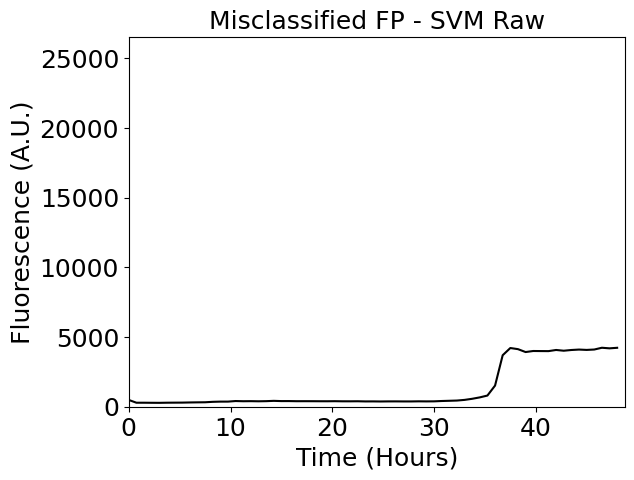

-------- Results on False Positives for SVM Metrics --------
Accuracy on False Positives: 0.3333333333333333
False Positives Account for 61.54% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 33.515625
Average RAF: 0.0379817175625
Average MPR: 7.9776120890625
Average MS: 782.25520829375
Correctly Classified FP Characteristics:
Average Time to Threshold: 42.65625
Average RAF: 0.023620714125
Average MPR: 5.768941949
Average MS: 362.15625


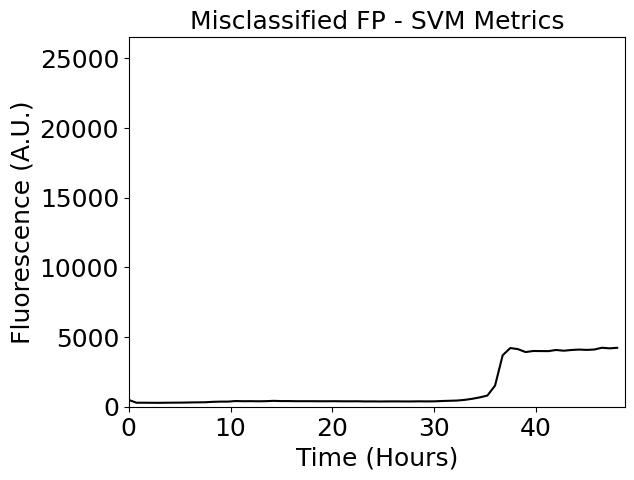

-------- Results on False Positives for MLP Raw --------
26/26 [==============================] - 0s 2ms/step
Accuracy on False Positives: 0.6666666666666666
False Positives Account for 32.00% of total misclassifications.
Misclassified FP Characteristics:
Average Time to Threshold: 26.0625
Average RAF: 0.051315150375
Average MPR: 7.93147727075
Average MS: 907.6562499624999
Correctly Classified FP Characteristics:
Average Time to Threshold: 41.8125
Average RAF: 0.0241344994375
Average MPR: 6.896344428187501
Average MS: 509.50520831250003


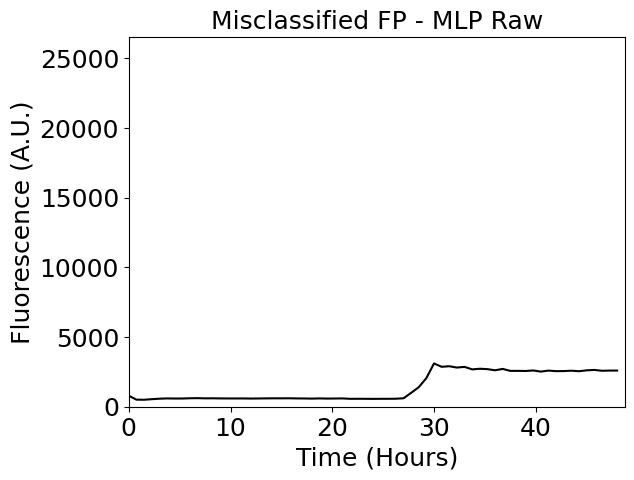

-------- Positive Characteristics for Reference --------
Time To Threshold:
	Min: 4.5, Average: 24.097911200807264, Max: 48.0
RAF:
	Min: 0.020833333, Average: 0.049054801466195765, Max: 0.222222222
MPR:
	Min: 1.241918665, Average: 11.743839485905147, Max: 54.23108384
MS:
	Min: 61.5, Average: 856.7055163084763, Max: 4282.833333
26/26 [==============================] - 0s 2ms/step


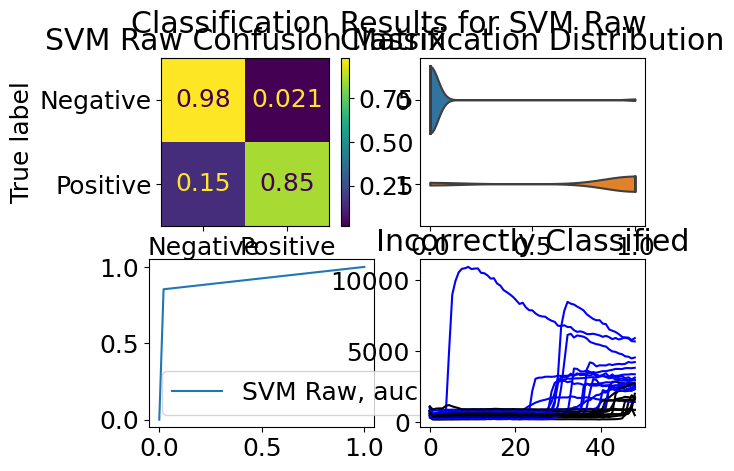

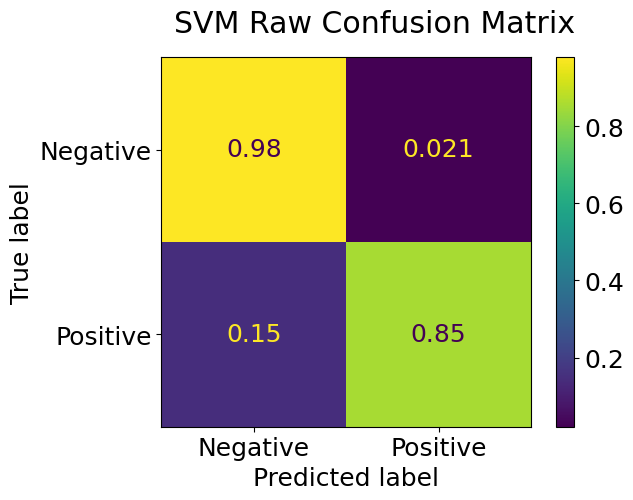

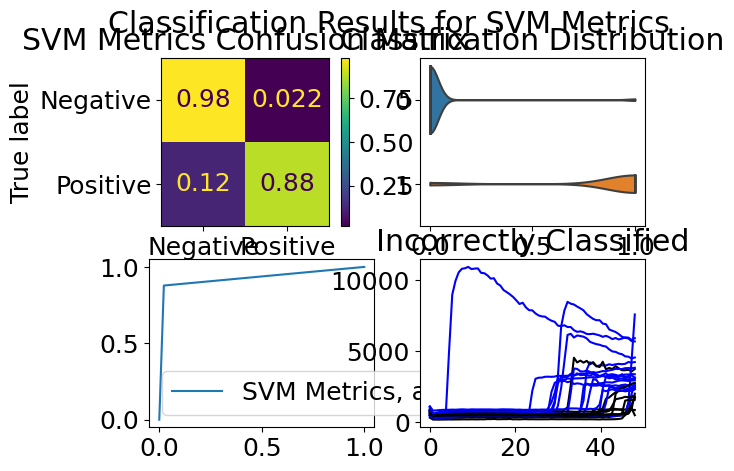

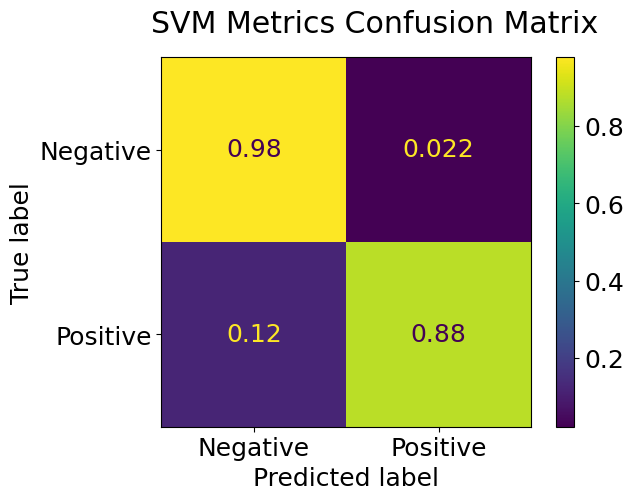

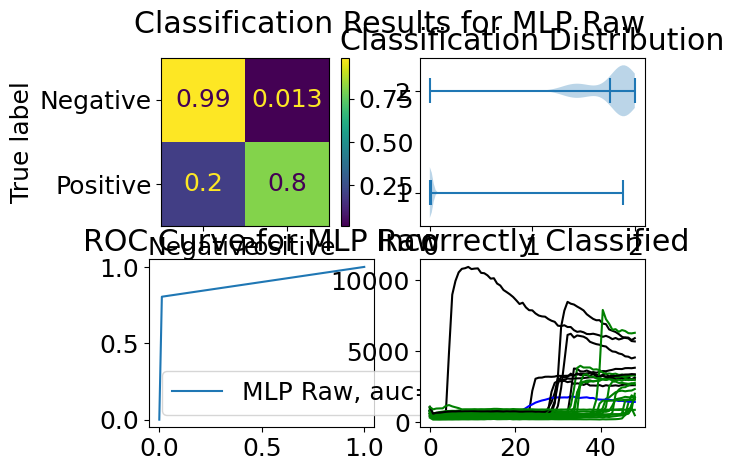

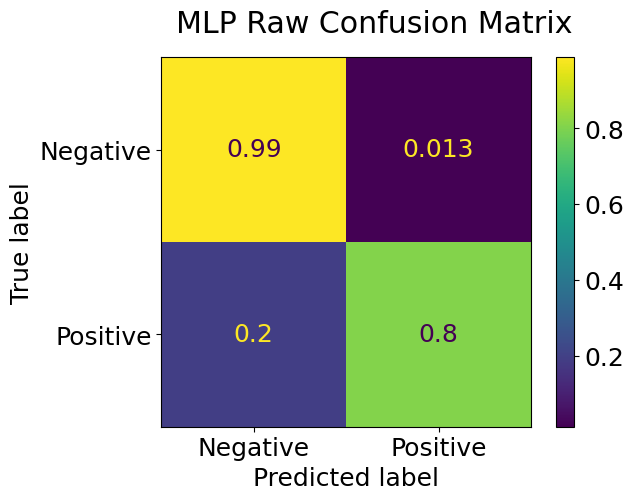

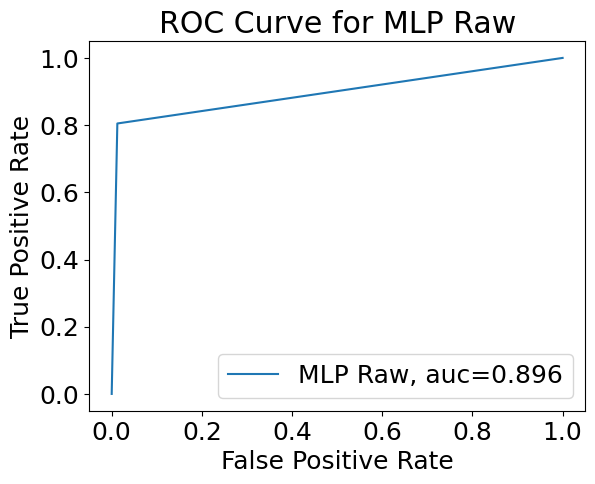

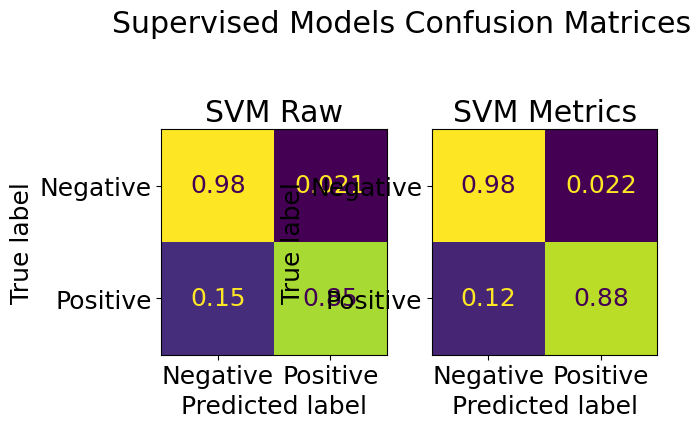

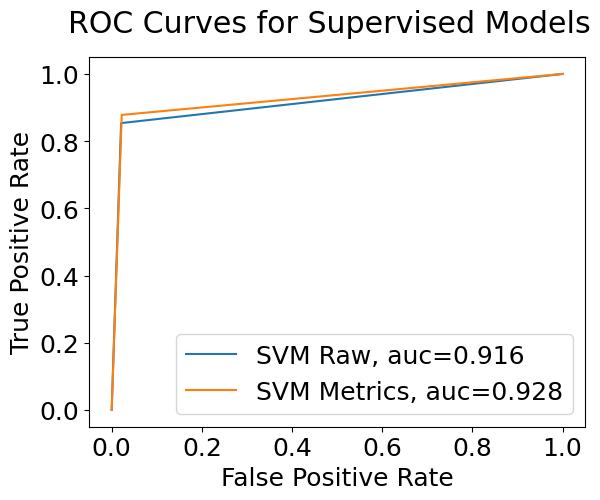

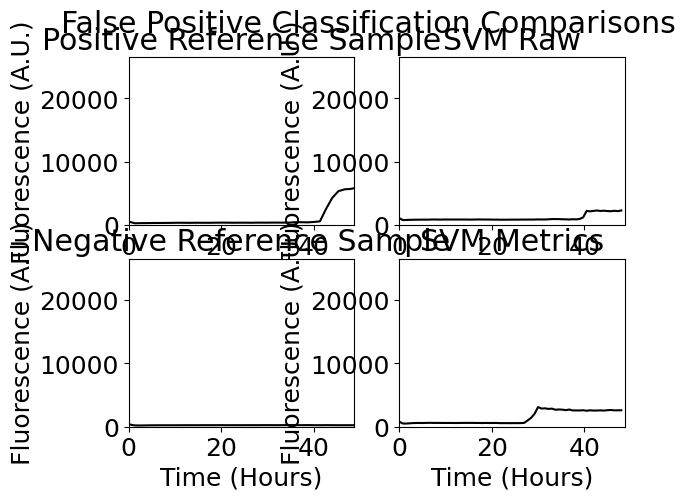

In [59]:
### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised'])
ml_quic.evaluate_fp_performance(tags=['Supervised'])
ml_quic.get_model_plots(tags=['Supervised'])
ml_quic.get_group_plots_supervised(tags = ['Supervised'])

### G-Well Evaluation

In [60]:
#%%
### Test on G Wells
ml_quic = ml_quic = ML_QuIC.ML_QuIC()
ml_quic.import_dataset(data_dir='./Data/GrinderGWells')
ml_quic.get_dataset_statistics()

ml_quic.add_model(KMeansModel.KMeansModel(n_clusters = 3,
                                          file_path= './SavedModels/Analysis/', model_name='kmeans'
                                          ), model_name='KMeans Metrics', data_type='analysis', tag='Unsupervised')

ml_quic.add_model(SVM.SVM(
    file_path='./SavedModels/Raw/', model_name='svm'
    ), model_name = 'SVM Raw', data_type = 'raw', tag = 'Supervised')

ml_quic.add_model(SVM.SVM(
    file_path='./SavedModels/Analysis/', model_name='svm'
    ), model_name = 'SVM Metrics', data_type = 'analysis', tag = 'Supervised')

ml_quic.add_model(MLP.MLP(NDIM = ml_quic.get_num_timesteps_raw(), 
                          file_path='./SavedModels/Raw/', model_name='mlp'
                          ), model_name = 'MLP Raw', data_type = 'raw', tag='Supervised')

ml_quic.separate_train_test(tags=['Supervised', 'Unsupervised'], train_type=3, file_loc='./TrainTest/GWells')

### Get Supervised Scores and Plots
ml_quic.get_model_scores(tags = ['Supervised', 'Unsupervised'])

pred_km, sample_list_km = ml_quic.evaluate_replicate_performance(model='KMeans Metrics')
pred_svm_r, sample_list_svmr = ml_quic.evaluate_replicate_performance(model='SVM Raw')
pred_svm_m, sample_list_svmm = ml_quic.evaluate_replicate_performance(model='SVM Metrics')
pred_mlp, sample_list_mlp = ml_quic.evaluate_replicate_performance(model='MLP Raw')

print('Model Sample Predictions:')
print('\n{:20s} {:20s} {:20s} {:20s} {:20s}'.format('Sample:', 'KMeans Metrics:', 'SVM Raw:', 'SVM Metrics:', 'MLP Raw:'))
for i in range(len(pred_km)):
    if sample_list_km[i] != sample_list_mlp[i] or sample_list_mlp[i] != sample_list_svmm[i] or sample_list_svmm[i] != sample_list_svmr[i]:
        raise Exception('Sample order does not agree!')
    print('{:20s} {:20s} {:20s} {:20s} {:20s}'.format(sample_list_km[i], pred_km[i], pred_svm_r[i], pred_svm_m[i], pred_mlp[i]))


Loading Data from ./Data/GrinderGWells
---- Dataset Label Distribution ----
Negative Samples: 208
False Positive Samples: 0
Positive Samples: 96

---- Well Content Distribution: ----
Data Wells: 304
Control Wells: 0

KMeans Model Loaded:
<class 'sklearn.cluster._kmeans.KMeans'>

SVM Model Loaded:
<class 'sklearn.svm._classes.SVC'>

SVM Model Loaded:
<class 'sklearn.svm._classes.SVC'>
\MLP Model Loaded:
<class 'keras.engine.functional.Functional'>
SVM Raw:
              precision    recall  f1-score   support

         neg       0.86      1.00      0.93       208
         pos       1.00      0.66      0.79        96

    accuracy                           0.89       304
   macro avg       0.93      0.83      0.86       304
weighted avg       0.91      0.89      0.88       304

SVM Metrics:
              precision    recall  f1-score   support

         neg       0.90      1.00      0.95       208
         pos       1.00      0.76      0.86        96

    accuracy                        

c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\metrics\_classification.py:1592: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\metrics\_classification.py:1592: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\metrics\_classification.py:1592: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(tru

1/1 [==============================] - ETA: 0s

c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\metrics\_classification.py:1592: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
c:\Users\kyleh\anaconda3\envs\tf-keras-gpu\lib\site-packages\sklearn\metrics\_classification.py:1592: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


1/1 [==============================] - 0s 11ms/step
Model Sample Predictions:

Sample:              KMeans Metrics:      SVM Raw:             SVM Metrics:         MLP Raw:            
49G                  4/8                  2/8                  3/8                  1/8                 
49Gx01               0/8                  0/8                  0/8                  0/8                 
14G                  1/8                  0/8                  1/8                  0/8                 
14Gx01               1/8                  0/8                  0/8                  0/8                 
92G                  0/8                  0/8                  0/8                  0/8                 
92Gx01               5/8                  4/8                  4/8                  4/8                 
98G                  0/8                  0/8                  0/8                  0/8                 
98Gx01               4/8                  2/8                  3/8               

## Feature Threshold Analysis
### Selecting Most Important Time Steps

Text(0.5, 0, 'Hours')

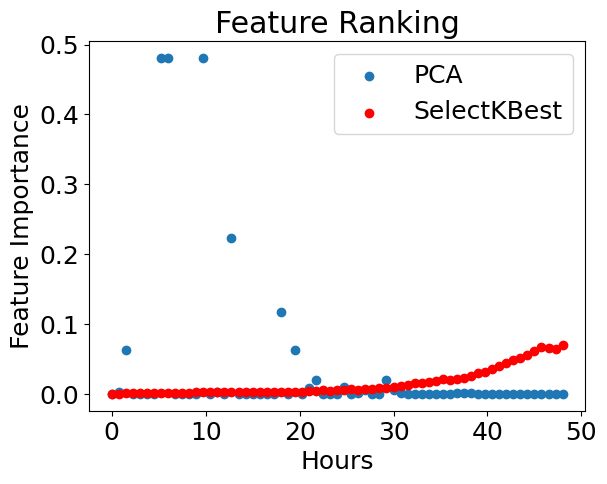

In [61]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

x = StandardScaler().fit_transform(ml_quic.get_numpy_dataset('raw'))
y = ml_quic.get_numpy_dataset('labels')

pca = PCA().fit(x)
skb = SelectKBest(k = 'all').fit(x, y)

most_important = [np.abs(pca.components_[i]).argmax() for i in range(pca.components_.shape[0])]
features = pca.explained_variance_ratio_[most_important]

plt.scatter(np.arange(len(features)) * 0.75, features)
plt.scatter(np.arange(len(features)) * 0.75, skb.scores_ / (np.sum(skb.scores_)), c='r')
plt.legend(['PCA', 'SelectKBest'])
plt.title('Feature Ranking')
plt.ylabel('Feature Importance')
plt.xlabel('Hours')